# 📈 Ethereum Daily Prices: Kickstart Your Analysis 🚀

## Welcome! 🚀
Thank you for checking out this notebook. If you're interested in Ethereum and cryptocurrency market trends, you've come to the right place. This notebook serves as a comprehensive starter kit for analyzing Ethereum's daily prices using powerful time-series analysis techniques.

## What This Notebook Offers
- **Easy-to-Follow Structure:** 📘 We guide you through loading the data, initial explorations, plotting key statistics, and basic time-series decomposition.
- **Analysis Readiness:** 🔍 Each section is designed to provide insights and code that can be easily extended. From day-to-day volatility to longer-term trends, we've set the groundwork for you to dive deeper.
- **Fork and Customize:** 👨‍💻 Feel free to fork this notebook, tweak the parameters, or add more complex algorithms to suit your specific analysis needs. This is just your starting point!

## Get Started!
We encourage you to fork this notebook to begin your journey into Ethereum's fluctuating world. Use this as a foundation to build more detailed and specific analyses. Whether you're a seasoned data scientist or a crypto enthusiast eager to glean more insights from data, there's something here for everyone.

**Happy Analyzing!** 📊

If you are also interested in Bitcoin, you might want to check out this notebook:
[ 💹🔍 Bitcoin Daily Prices: Kickstart Your Analysis](https://www.kaggle.com/code/pawelkauf/bitcoin-daily-prices-kickstart-your-analysis)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Preview of the Data:
         Date        Open        High         Low       Close   Adj Close  \
0  2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1  2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2  2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3  2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4  2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  
0   893249984  
1   885985984  
2   842300992  
3  1613479936  
4  1041889984  

Summary Statistics:
              Open         High          Low        Close    Adj Close  \
count  2368.000000  2368.000000  2368.000000  2368.000000  2368.000000   
mean   1329.469809  1367.068556  1287.956400  1330.435344  1330.435344   
std    1163.169292  1195.884825  1125.876869  1163.159037  1163.159037   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     240.765358   245.8055

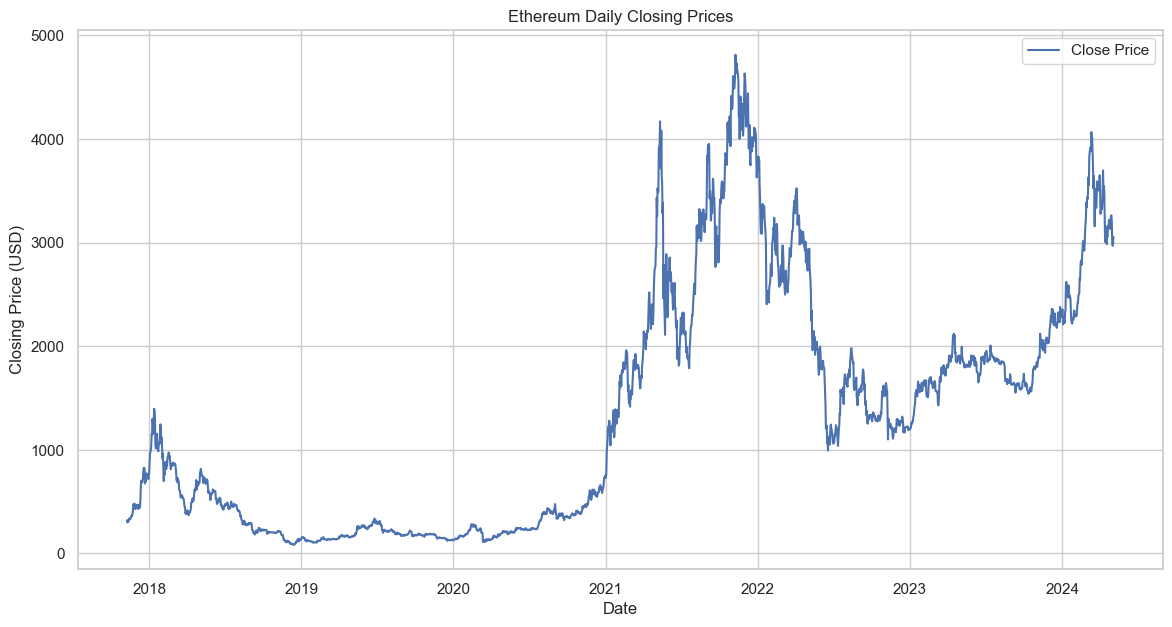


Missing values in the dataset:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Cleaned data saved to '/kaggle/working/cleaned_Ethereum_prices.csv'


In [2]:
# Setting the aesthetic style for the plots
sns.set(style='whitegrid')

# Loading Bitcoin daily price data from the CSV file
df = pd.read_csv('cleaned_Ethereum_prices.csv')

# Displaying the first few rows of the dataset to understand its structure
print("Preview of the Data:")
print(df.head())

# Converting the 'Date' column to datetime format for time series analysis
df['Date'] = pd.to_datetime(df['Date'])

# Setting 'Date' as the index of the dataframe
df.set_index('Date', inplace=True)

# Displaying summary statistics of the dataframe
print("\nSummary Statistics:")
print(df.describe())

# Plotting the closing price of Bitcoin over time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('Ethereum Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Save the cleaned and processed dataframe for further analysis
df.to_csv('/kaggle/working/cleaned_Ethereum_prices.csv')
print("\nCleaned data saved to '/kaggle/working/cleaned_Ethereum_prices.csv'")

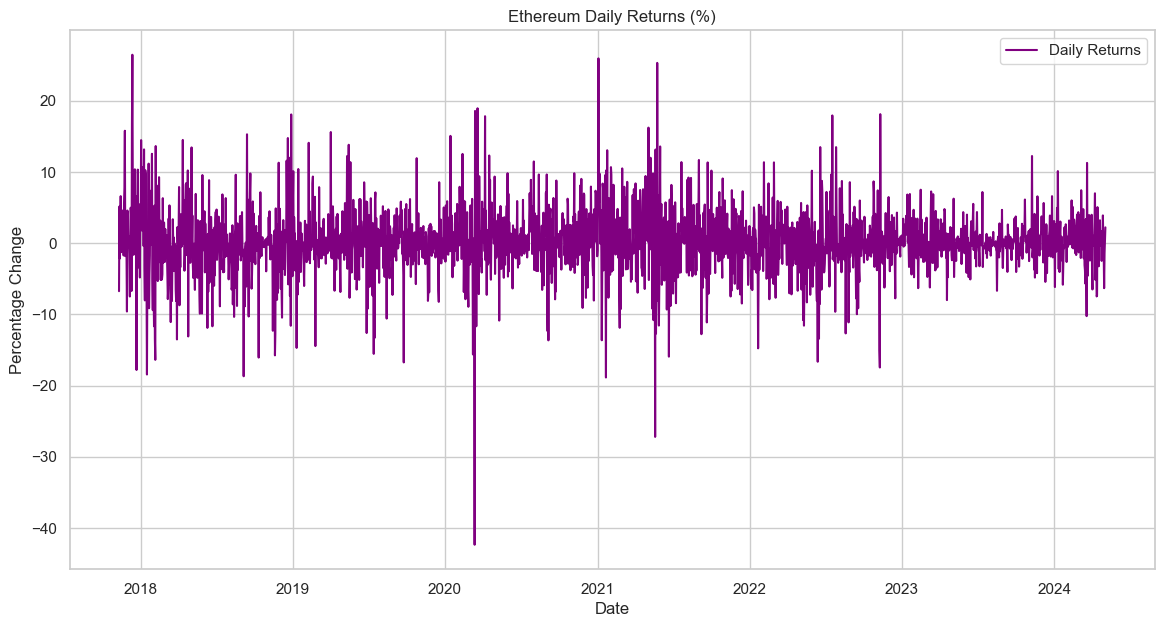

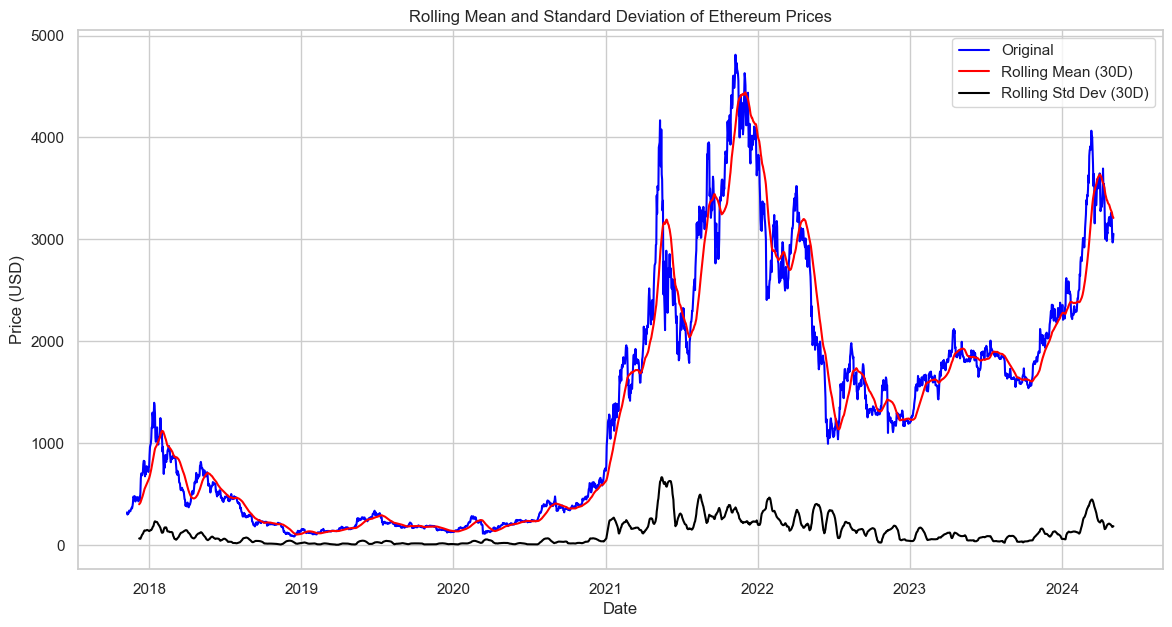

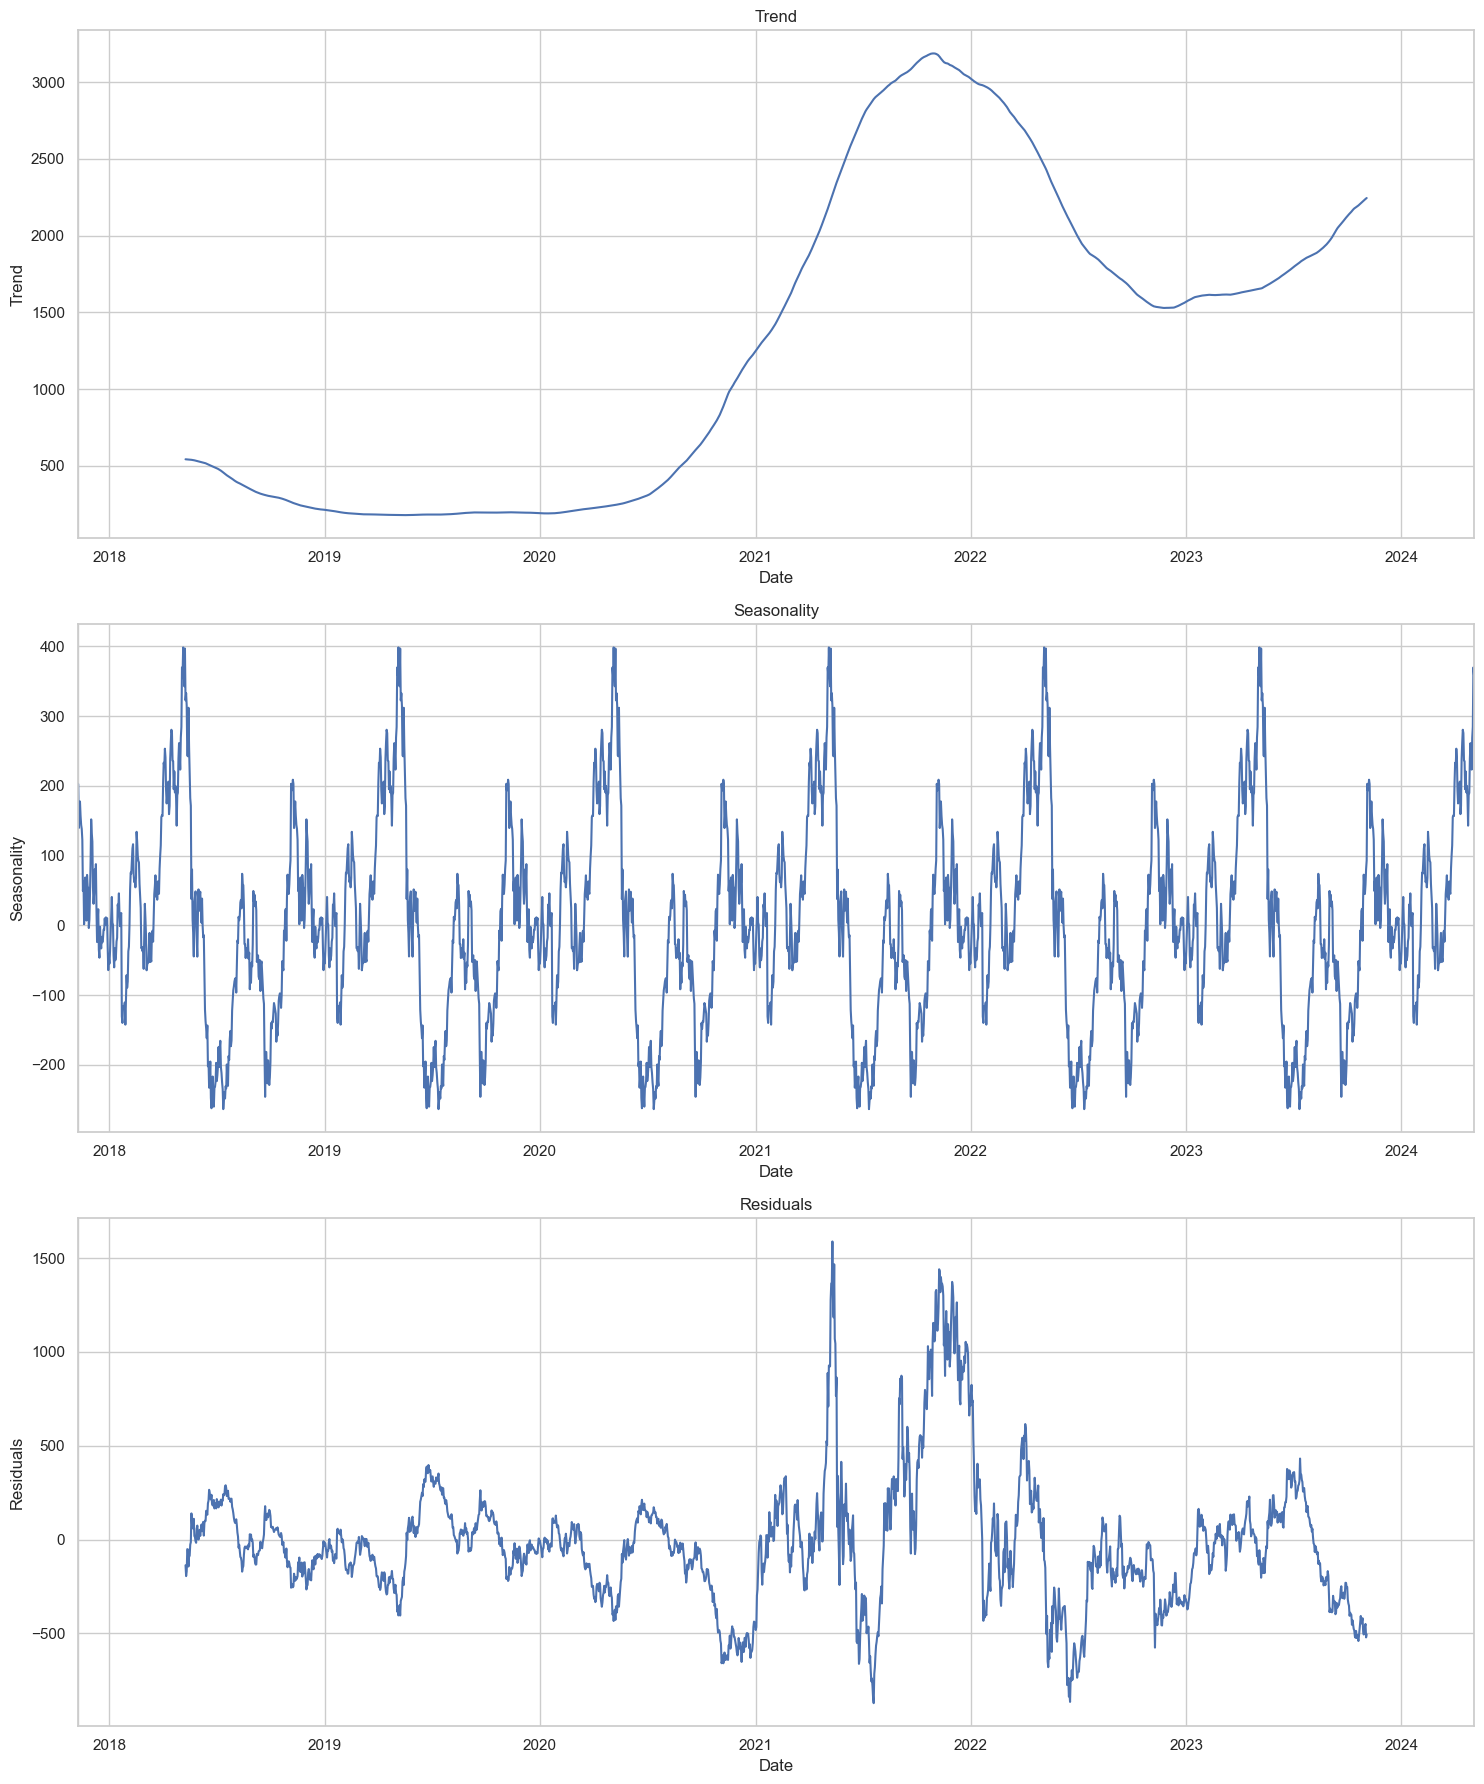

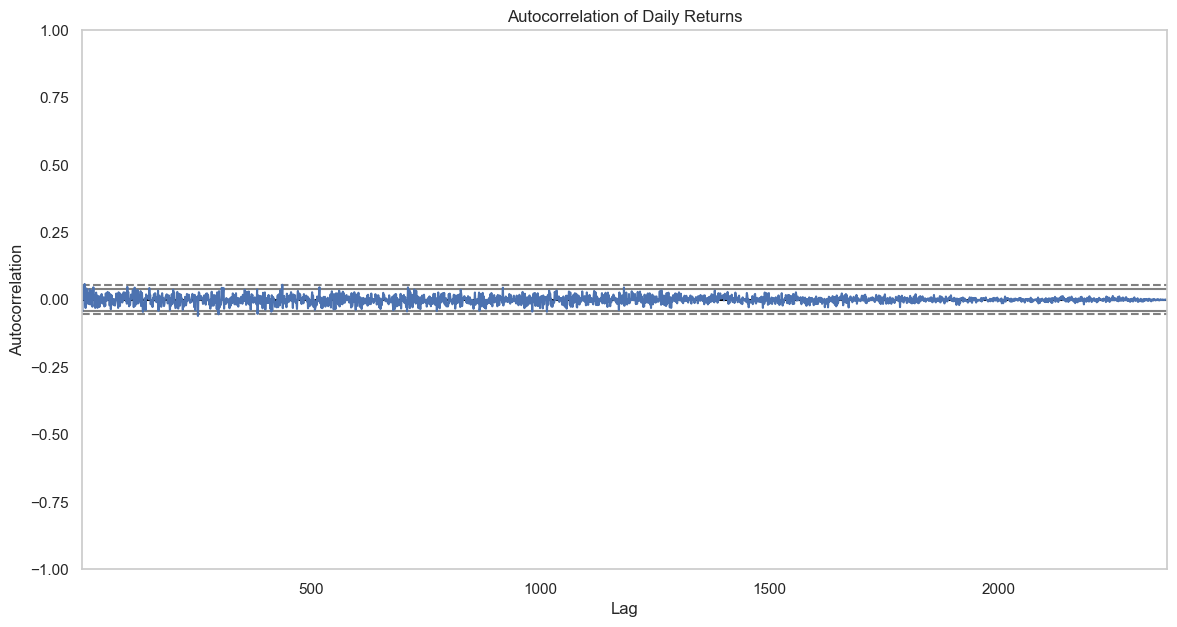

In [3]:
# Calculate the daily returns as percentage changes in the closing price
df['Daily Returns'] = df['Close'].pct_change() * 100

# Plotting the daily returns
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Daily Returns'], label='Daily Returns', color='purple')
plt.title('Ethereum Daily Returns (%)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()

# Calculate rolling mean and standard deviation to visualize trends and volatility
df['Rolling Mean'] = df['Close'].rolling(window=30).mean()
df['Rolling Std'] = df['Close'].rolling(window=30).std()

# Plotting rolling statistics
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], color='blue', label='Original')
plt.plot(df['Rolling Mean'], color='red', label='Rolling Mean (30D)')
plt.plot(df['Rolling Std'], color='black', label='Rolling Std Dev (30D)')
plt.title('Rolling Mean and Standard Deviation of Ethereum Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Seasonal decomposition of the closing price to observe trends, seasonality, and residuals
decomposition = seasonal_decompose(df['Close'], model='additive', period=365)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 18))
decomposition.trend.plot(ax=ax1, title='Trend')
decomposition.seasonal.plot(ax=ax2, title='Seasonality')
decomposition.resid.plot(ax=ax3, title='Residuals')
ax1.set_ylabel('Trend')
ax2.set_ylabel('Seasonality')
ax3.set_ylabel('Residuals')
plt.tight_layout()
plt.show()

# Display autocorrelation plot to identify if there is any autocorrelation in daily returns
plt.figure(figsize=(14, 7))
autocorrelation_plot(df['Daily Returns'].dropna())
plt.title('Autocorrelation of Daily Returns')
plt.show()

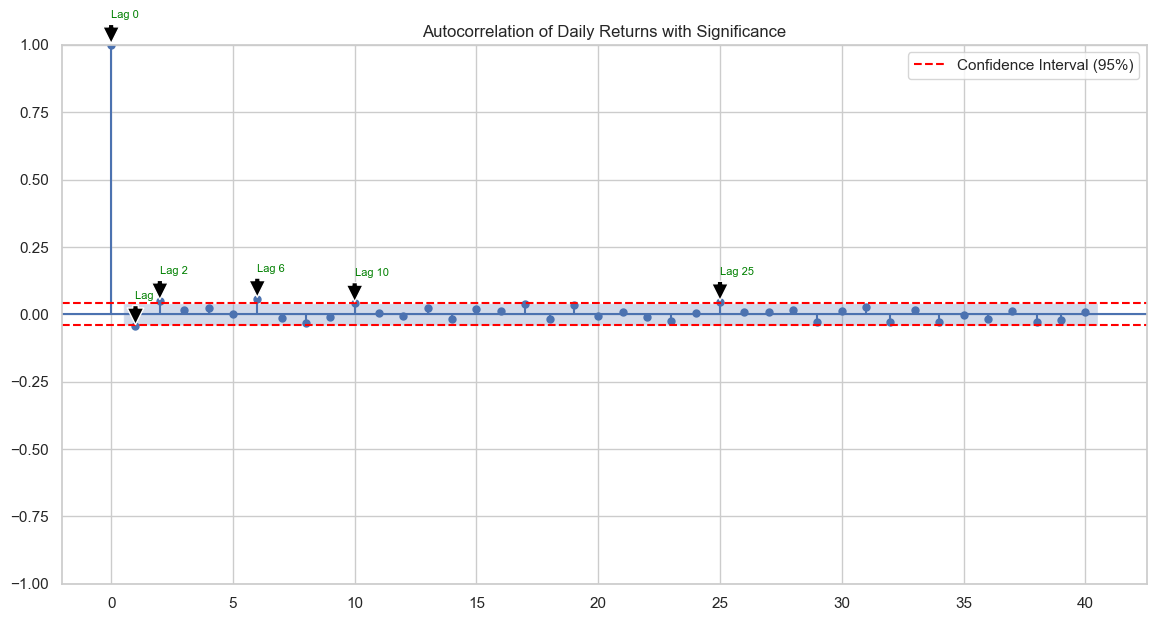

In [4]:
# Calculate the number of observations to set the confidence interval
n_obs = df['Daily Returns'].dropna().shape[0]
conf_interval = 1.96 / np.sqrt(n_obs)

# Creating an enhanced autocorrelation plot
plt.figure(figsize=(14, 7))
ax = plt.gca()

# Plotting autocorrelation with confidence intervals
plot_acf(df['Daily Returns'].dropna(), ax=ax, alpha=0.05, lags=40)

# Highlighting significant lags beyond the confidence interval
ax.axhline(y=conf_interval, color='red', linestyle='--', label='Confidence Interval (95%)')
ax.axhline(y=-conf_interval, color='red', linestyle='--')

# Adding labels for significant lags
significant_lags = [lag for lag in range(41) if abs(df['Daily Returns'].autocorr(lag)) > conf_interval]
for lag in significant_lags:
    ax.annotate(f'Lag {lag}', xy=(lag, df['Daily Returns'].autocorr(lag)), xytext=(lag, 0.1 + df['Daily Returns'].autocorr(lag)),
                arrowprops=dict(facecolor='black', shrink=0.05), fontsize=8, color='green')

plt.title('Autocorrelation of Daily Returns with Significance')
plt.legend()
plt.show()